In [1]:
## Observations and Insights 
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np

# Set the seed so our data is reproducible
random.seed(42)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path) 

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice, by filtering the unique values of the Mouse ID
mouse_count = len(combined_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data.duplicated(['Mouse ID'])]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean_df = combined_data.drop_duplicates("Mouse ID")
data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mouse = data_clean_df["Mouse ID"].count()
number_mouse

249

## Summary Statistics

In [7]:
data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_clean_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_drugregimen = combined_data.groupby(['Drug Regimen'])
Summary_stats_df = pd.DataFrame({'Mean': round(group_drugregimen['Tumor Volume (mm3)'].mean(),2),
                             'Median': round(group_drugregimen['Tumor Volume (mm3)'].median(),2),
                             'Variance': round(group_drugregimen['Tumor Volume (mm3)'].var(),2),
                             'Standard Deviation': round(group_drugregimen['Tumor Volume (mm3)'].std(),2),
                             'SEM': round(group_drugregimen['Tumor Volume (mm3)'].sem(),2)
                            })
Summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var,np.std,st.sem]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

PermissionError: [Errno 13] Permission denied: '/TotalMeasurementsPandas.png'

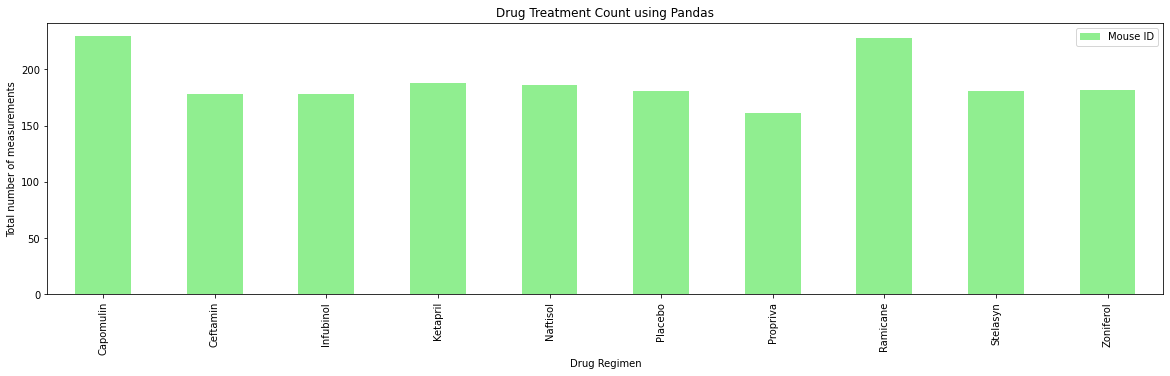

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_data = pd.DataFrame(combined_data.groupby(['Drug Regimen']).count())
group_data = group_data.drop(columns = ['Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
group_data.plot(kind="bar", figsize=(20,5), color = 'lightgreen')
plt.title('Drug Treatment Count using Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of measurements')
plt.savefig("/TotalMeasurementsPandas.png")
plt.show()
plt.tight_layout()


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
combined_data.head()
x_axis = combined_data['Drug Regimen'].unique()
group_measurements_count = combined_data.groupby(['Drug Regimen']).count()
total_measurements = group_measurements_count['Mouse ID']
plt.bar(x_axis,total_measurements, color="skyblue", align="center")
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Drug Treatment Count using Pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of measurements')
plt.savefig("/TotalMeasurementsPyplot.png")

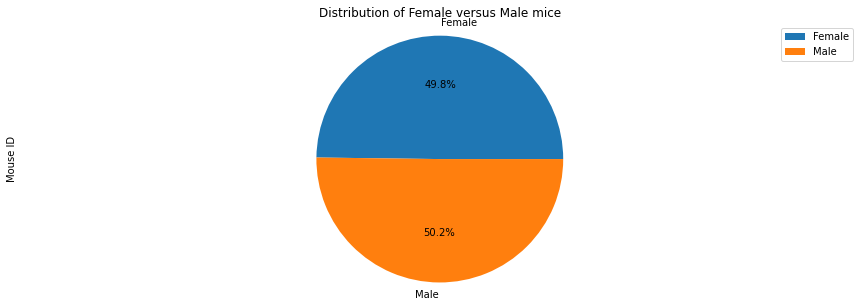

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_clean_df
gender_df = pd.DataFrame(data_clean_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()
gender_df = gender_df[["Sex","Mouse ID"]]

gender_df.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%', labels=gender_df["Sex"], 
               title=("Distribution of Female versus Male mice"))

plt.axis("equal")
plt.show()

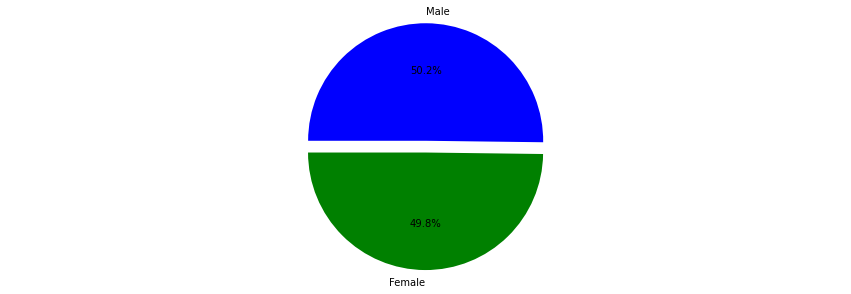

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = (data_clean_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender_mice
labels = ["Female", "Male"]
colors = ["green", "blue"]
explode = (0.1, 0)
plt.pie(gender_mice, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 180)
plt.axis("equal")


# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
